In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 22 14:09:18 2019

@author: Huan Zheng
"""
# logistic regression

'\nCreated on Fri Mar 22 14:09:18 2019\n\n@author: Huan Zheng\n'

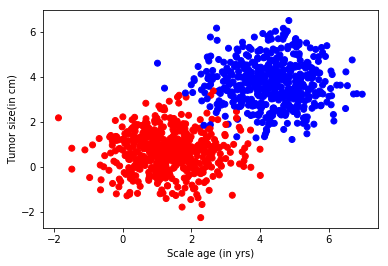

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
%matplotlib inline

# 生成样本
def generate(sample_size, mean, cov, diff, regression):
    num_classes = 2
    samples_per_class = int(sample_size / 2)
    
    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean + d, cov, samples_per_class)
        Y1 = (ci + 1) * np.ones(samples_per_class)
        
        X0 = np.concatenate((X0, X1))
        Y0 = np.concatenate((Y0, Y1))
        
    if regression == False: # one_hot 编码
        class_idn = [Y==class_number for class_number in range(num_classes)]
        Y = np.asarray(np.hstack(class_idn), dtype=np.float32)
    X, Y = shuffle(X0, Y0)
    
    return X, Y

np.random.seed(10)
num_classes = 2
mean = np.random.randn(num_classes)
cov = np.eye(num_classes)
X, Y = generate(1000, mean, cov, [3.0], True)
colors = ['r' if l == 0 else 'b' for l in Y[:]]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel('Scale age (in yrs)')
plt.ylabel('Tumor size(in cm)')
plt.show()
lab_dim = 1
input_dim = 2

Epoch: 0001 cost =  0.269347906 err =  0.28275156021118164
Epoch: 0002 cost =  0.189757362 err =  0.11863864421844482
Epoch: 0003 cost =  0.147563547 err =  0.07723969630897046
Epoch: 0004 cost =  0.120565586 err =  0.058206767216324805
Epoch: 0005 cost =  0.102567017 err =  0.0473406502045691
Epoch: 0006 cost =  0.090000525 err =  0.04058757511898875
Epoch: 0007 cost =  0.080819361 err =  0.03609656834974885
Epoch: 0008 cost =  0.073832452 err =  0.03294069016352296
Epoch: 0009 cost =  0.068325311 err =  0.03062337261624634
Epoch: 0010 cost =  0.063854881 err =  0.02886107119731605
Epoch: 0011 cost =  0.060137164 err =  0.02748245740775019
Epoch: 0012 cost =  0.056983586 err =  0.026378840869292618
Epoch: 0013 cost =  0.054264709 err =  0.0254783194931224
Epoch: 0014 cost =  0.051888693 err =  0.024731635041534902
Epoch: 0015 cost =  0.049788784 err =  0.024104005983099343
Epoch: 0016 cost =  0.047914926 err =  0.02357022339710966
Epoch: 0017 cost =  0.046229135 err =  0.0231116105522

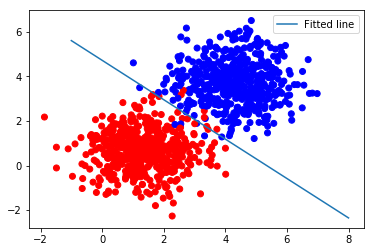

In [13]:
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_labels = tf.placeholder(tf.float32, [None, lab_dim])
# 定义学习参数
W = tf.Variable(tf.random_normal([input_dim, lab_dim]), name='weight')
b = tf.Variable(tf.zeros([lab_dim]), name='bias')

output = tf.nn.sigmoid(tf.matmul(input_features, W) + b)
cross_entropy = -(input_labels * tf.log(output) + (1 - input_labels) * tf.log(1 - output))
ser = tf.square(input_labels - output)
loss = tf.reduce_mean(cross_entropy)
err = tf.reduce_mean(ser)
optimizer = tf.train.AdamOptimizer(0.04)
# 尽量用这个优化器，收敛快，动态调节梯度
train = optimizer.minimize(loss)

max_epochs = 50
mini_batch_size = 25

# 启动Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # 向模型输入数据
    for epoch in range(max_epochs):
        summer = 0
        for i in range(np.int32(len(Y) / mini_batch_size)):
            x1 = X[i * mini_batch_size: (i + 1) * mini_batch_size, :]
            y1 = np.reshape(Y[i * mini_batch_size: (i + 1) * mini_batch_size], [-1, 1])
            tf.reshape(y1, [-1, 1])
            _, lossval, outputval, errval = sess.run([train, loss, output, err], feed_dict={input_features: x1, input_labels: y1})
            summer += errval
        
        print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(lossval), 'err = ', summer / mini_batch_size)
    
    train_X, train_Y = generate(100, mean, cov, [3.0], True)
    colors = ['r' if l == 0 else 'b' for l in Y[:]]
    plt.scatter(X[:,0], X[:,1], c=colors)
    x = np.linspace(-1, 8, 200)
    y = -x * (sess.run(W)[0] / sess.run(W)[1]) - sess.run(b) / sess.run(W)[1]
    plt.plot(x, y, label='Fitted line')
    plt.legend()
    plt.show()